CODIFICAÇÃo

1- Ler ficheiro byte a byte
nº simbolos
probabilidades

2. construir tabela huffman -> dicionario (simbolo:codigo)
3. Codificar ficheiro
4. Escrever tabela nºsimbolos
[simbolo:8bits
comprimento:5bits
Codigo:...]

5.Escrever Ficheiro - bit stuffing
3bits contagem de bit stuffing

In [59]:
import numpy as np
import matplotlib.pyplot as plt
D={'a':'0','b':'10','c':'110','d':'1110','e':'1111'}

In [2]:
D

{'a': '0', 'b': '10', 'c': '110', 'd': '1110', 'e': '1111'}

In [3]:
D['a']

'0'

In [4]:
msg = 'aabcdeeedcdeabb'
code =''

In [6]:
for s in msg:
    code = code+D[s]
    print(s,D[s])

a 0
a 0
b 10
c 110
d 1110
e 1111
e 1111
e 1111
d 1110
c 110
d 1110
e 1111
a 0
b 10
b 10


In [7]:
code

'0010110111011111111111111101101110111101010'

In [9]:
p = np.array([5,2,2,1,1])
p = p/np.sum(p)
p

array([0.45454545, 0.18181818, 0.18181818, 0.09090909, 0.09090909])

In [10]:
idx = np.argsort(p)
idx

array([3, 4, 1, 2, 0], dtype=int64)

In [11]:
i0 = idx[0]
i1 = idx[1]
i0
i1

4

In [12]:
i0

3

In [13]:
s = [(i,) for i in range(5)]
s

[(0,), (1,), (2,), (3,), (4,)]

In [14]:
s[i0] = s[i0] + s[i1]
s

[(0,), (1,), (2,), (3, 4), (4,)]

In [15]:
s.pop(i1)

(4,)

In [16]:
s

[(0,), (1,), (2,), (3, 4)]

In [17]:
p

array([0.45454545, 0.18181818, 0.18181818, 0.09090909, 0.09090909])

In [18]:
p[i0] = p[i0] + p[i1]

In [19]:
p

array([0.45454545, 0.18181818, 0.18181818, 0.18181818, 0.09090909])

In [20]:
np.delete(p,i1)

array([0.45454545, 0.18181818, 0.18181818, 0.18181818])

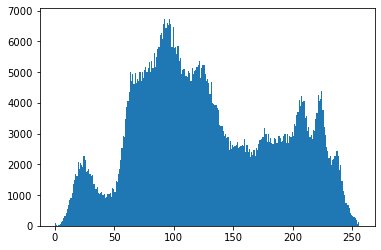

In [23]:
from time import time
from os import path
import numpy as np
import cv2
import matplotlib.pyplot as plt
# Ler um dos ficheiros
x = np.fromfile("Lena.tif",dtype="uint8")
# Calcular o histogram
h, bins, patches = plt.hist(x,256,[0,256])

In [39]:
type(h)

numpy.ndarray

118.0 -> 0000000
166.0 -> 00000010
235.0 -> 00000011
237.0 -> 00000100
56.0 -> 00000101
128.0 -> 0000011
229.0 -> 00001000
236.0 -> 00001001
75.0 -> 0000101
169.0 -> 00001100
163.0 -> 00001101
64.0 -> 0000111
67.0 -> 0001000
127.0 -> 0001001
76.0 -> 0001010
65.0 -> 0001011
111.0 -> 0001100
66.0 -> 0001101
168.0 -> 00011100
33.0 -> 000111010
16.0 -> 000111011
113.0 -> 0001111
114.0 -> 0010000
80.0 -> 0010001
119.0 -> 0010010
112.0 -> 0010011
148.0 -> 00101000
160.0 -> 00101001
81.0 -> 0010101
107.0 -> 0010110
82.0 -> 0010111
162.0 -> 00110000
171.0 -> 00110001
110.0 -> 0011001
153.0 -> 00110100
170.0 -> 00110101
109.0 -> 0011011
83.0 -> 0011100
161.0 -> 00111010
215.0 -> 00111011
108.0 -> 0011110
106.0 -> 0011111
78.0 -> 0100000
228.0 -> 01000010
57.0 -> 01000011
77.0 -> 0100010
6.0 -> 010001100000
254.0 -> 010001100001
251.0 -> 01000110001
246.0 -> 0100011001
48.0 -> 010001101
150.0 -> 01000111
105.0 -> 0100100
126.0 -> 0100101
84.0 -> 0100110
154.0 -> 01001110
216.0 -> 01001111
159.0 

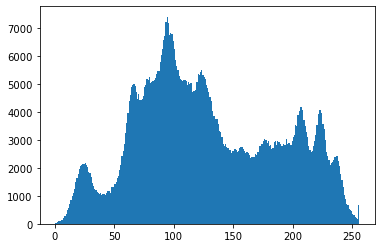

In [166]:
# A Huffman Tree Node
import heapq
 
 
class node:
    def __init__(self, freq, symbol, left=None, right=None):
        # frequency of symbol
        self.freq = freq
 
        # symbol name (character)
        self.symbol = symbol
 
        # node left of current node
        self.left = left
 
        # node right of current node
        self.right = right
 
        # tree direction (0/1)
        self.huff = ''
 
    def __lt__(self, nxt):
        return self.freq < nxt.freq
 
 
# utility function to print huffman
# codes for all symbols in the newly
# created Huffman tree
def printNodes(node, val=''):
 
    # huffman code for current node
    newVal = val + str(node.huff)
 
    # if node is not an edge node
    # then traverse inside it
    if(node.left):
        printNodes(node.left, newVal)
    if(node.right):
        printNodes(node.right, newVal)
 
        # if node is edge node then
        # display its huffman code
    if(not node.left and not node.right):
        print(f"{node.symbol} -> {newVal}")
 
x = cv2.imread("file1.jpg")
xi = x.ravel()
symbol_ocorr, symbol_list, patches = plt.hist(xi,256,[0,256]) 
# characters for huffman tree
chars = symbol_list
 
# frequency of characters
freq = symbol_ocorr
 
# list containing unused nodes
nodes = []
 
# converting characters and frequencies
# into huffman tree nodes
for x in range(len(chars)-1):
    heapq.heappush(nodes, node(freq[x], chars[x]))
 
while len(nodes) > 1:
 
    # sort all the nodes in ascending order
    # based on their frequency
    left = heapq.heappop(nodes)
    right = heapq.heappop(nodes)
 
    # assign directional value to these nodes
    left.huff = 0
    right.huff = 1
 
    # combine the 2 smallest nodes to create
    # new node as their parent
    newNode = node(left.freq+right.freq, left.symbol+right.symbol, left, right)
 
    heapq.heappush(nodes, newNode)
 
# Huffman Tree is ready!
printNodes(nodes[0])



In [158]:
symbols = {'A', 'B', 'C', 'D'}
probabilities = [0.1, 0.4, 0.2, 0.3]

codes = gen_huff_table(symbols, probabilities)
print(codes)


{'D': '0', 'A': '1'}


In [167]:
def encode_huff(message, codes):
    # Initialize an empty bit sequence
    bits = ""

    # Encode each symbol in the message using its Huffman code
    for symbol in message:
        bits += codes[symbol]

    # Return the resulting bit sequence
    return bits


In [171]:
message = "ABCDA"
codes = {'A': '10', 'B': '0', 'C': '11', 'D': '2'}

bits = encode_huff(message, codes)
print(bits)


10011210


In [172]:
def decode_huff(bits, codes):
    # Initialize an empty decoded message
    message = ""

    # Initialize a buffer for the current bit sequence
    buffer = ""

    # Iterate over each bit in the bit sequence
    for bit in bits:
        # Add the bit to the buffer
        buffer += bit

        # Check if the buffer contains a Huffman code
        if buffer in codes.values():
            # Decode the symbol corresponding to the code
            symbol = list(codes.keys())[list(codes.values()).index(buffer)]

            # Add the symbol to the decoded message
            message += symbol

            # Reset the buffer
            buffer = ""

    # Return the decoded message
    return message

In [173]:
message = "ABCDA"
codes = {'A': '10', 'B': '0', 'C': '11', 'D': '2'}

bits = encode_huff(message, codes)
decoded_message = decode_huff(bits, codes)

print(message == decoded_message)  # True

True


In [4]:
def huffman(p):
    N=len(p)
    simb=[(i,) for i in range(N)]
    cod = ['']*N
    while len(p)>1:
        print(simb)
        print(cod)
        print(p)
        idx = np.argsort(p)
        i0 = idx[0]
        i1 = idx[1]
        print(i0,i1)
        for i in simb[i0]:
            cod[i] = '0'+cod[i]
        for i in simb[i1]:
            cod[i] = '1'+cod[i]
        
        p[i0] = p[i0] + p[i1]
        p = np.delete(p, i1)
        simb[i0] = simb[i0] + simb[i1]
        simb.remove(simb[i1])
        
    return cod

p = np.random.randint(1,20,6)
print(p)
print(huffman(p))

[ 7 19  9  7  5 14]
[(0,), (1,), (2,), (3,), (4,), (5,)]
['', '', '', '', '', '']
[ 7 19  9  7  5 14]
4 0
[(1,), (2,), (3,), (4, 0), (5,)]
['1', '', '', '', '0', '']
[19  9  7 12 14]
2 1
[(1,), (3, 2), (4, 0), (5,)]
['1', '', '1', '0', '0', '']
[19 16 12 14]
2 3
[(1,), (3, 2), (4, 0, 5)]
['01', '', '1', '0', '00', '1']
[19 16 26]
1 0
[(3, 2, 1), (4, 0, 5)]
['01', '1', '01', '00', '00', '1']
[35 26]
1 0
['001', '11', '101', '100', '000', '01']


In [42]:
import re
s='01010101010101001010010101010110'
print(len(s))
a = re.findall('[01]{8}',s)

32


In [43]:
int(a[0],2)

85

In [44]:
b=np.array([int(i,2) for i in a],dtype = 'uint8' )

In [45]:
f =open('xpto3.b','wb')
f.write(b)
f.close()

In [100]:
a = np.fromfile('DecUniversalDH.txt',dtype='uint8')

In [101]:
a

array([ 10,  68, 101, ...,  46,  10,  10], dtype=uint8)

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Example array of ASCII character codes
arr = np.array([100, 102, 99, 99, 99, 100, 113, 126, 120], dtype=np.uint8)

# Compute the histogram of the ASCII character codes
hist, bin_edges = np.histogram(a, bins=np.arange(256))

# Convert the count of occurrences to percentages
hist_pct = hist / a.size

hist_pct = hist_pct[hist_pct != 0]

hist_pct = np.round(hist_pct, decimals=3)

bincount = np.bincount(a)

bincount = bincount[bincount != 0]

print(np.sum(hist_pct))

print(np.unique(a))

print(hist_pct)

print(bincount)

0.999
[ 10  32  44  45  46  48  49  50  51  52  53  54  55  56  57  58  59  65
  67  68  69  71  72  78  79  80  81  84  85  97  98  99 100 101 102 103
 104 105 106 108 109 110 111 112 113 114 115 116 117 118 120 122 160 161
 162 163 167 169 170 173 179 181 186 194 195]
[0.013 0.158 0.01  0.    0.008 0.    0.001 0.001 0.    0.    0.    0.
 0.    0.    0.    0.    0.001 0.003 0.001 0.001 0.001 0.    0.    0.001
 0.    0.    0.    0.003 0.001 0.083 0.006 0.024 0.052 0.096 0.006 0.01
 0.004 0.061 0.002 0.021 0.029 0.038 0.081 0.02  0.005 0.051 0.061 0.04
 0.027 0.009 0.001 0.002 0.002 0.002 0.    0.007 0.008 0.003 0.002 0.003
 0.001 0.002 0.003 0.003 0.031]
[ 160 1883  115    5   90    3   13   13    4    3    3    3    3    3
    3    1   11   40   10   11    7    1    3   15    5    2    1   30
    7  991   69  287  618 1143   72  117   46  733   19  256  342  449
  970  234   57  612  729  480  323  110   13   22   25   23    5   86
   90   31   18   41   13   25   38   30  365]


In [93]:
print(huffman(bincount))
#print(len(huffman(bincount)))

[(0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,), (11,), (12,)]
['', '', '', '', '', '', '', '', '', '', '', '', '']
[3 2 1 2 1 1 1 2 1 2 2 2 1]
2 4
[(0,), (1,), (2, 4), (3,), (5,), (6,), (7,), (8,), (9,), (10,), (11,), (12,)]
['', '', '0', '', '1', '', '', '', '', '', '', '', '']
[3 2 2 2 1 1 2 1 2 2 2 1]
4 5
[(0,), (1,), (2, 4), (3,), (5, 6), (7,), (8,), (9,), (10,), (11,), (12,)]
['', '', '0', '', '1', '0', '1', '', '', '', '', '', '']
[3 2 2 2 2 2 1 2 2 2 1]
6 10
[(0,), (1,), (2, 4), (3,), (5, 6), (7,), (8, 12), (9,), (10,), (11,)]
['', '', '0', '', '1', '0', '1', '', '0', '', '', '', '1']
[3 2 2 2 2 2 2 2 2 2]
1 2
[(0,), (1, 2, 4), (3,), (5, 6), (7,), (8, 12), (9,), (10,), (11,)]
['', '0', '10', '', '11', '0', '1', '', '0', '', '', '', '1']
[3 4 2 2 2 2 2 2 2]
2 3
[(0,), (1, 2, 4), (3, 5, 6), (7,), (8, 12), (9,), (10,), (11,)]
['', '0', '10', '0', '11', '10', '11', '', '0', '', '', '', '1']
[3 4 4 2 2 2 2 2]
3 4
[(0,), (1, 2, 4), (3, 5, 6), (7, 8, 12), (9,), (10,

In [94]:
def encode_huff(message, codes):
    # Initialize an empty bit sequence
    bits = ""

    # Encode each symbol in the message using its Huffman code
    for symbol in message:
        bits += codes[symbol]

    # Return the resulting bit sequence
    return bits

In [98]:
message = "ABAC"
codes = huffman(bincount)
print(codes)

bits = encode_huff(message, codes)
print(bits)
#decoded_message = decode_huff(bits, codes)

#print(message == decoded_message)  # True

[(0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,), (11,), (12,)]
['', '', '', '', '', '', '', '', '', '', '', '', '']
[3 2 2 2 2 2 2 2 1 2 2 2 1]
8 12
[(0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,), (8, 12), (9,), (10,), (11,)]
['', '', '', '', '', '', '', '', '0', '', '', '', '1']
[3 2 2 2 2 2 2 2 2 2 2 2]
1 2
[(0,), (1, 2), (3,), (4,), (5,), (6,), (7,), (8, 12), (9,), (10,), (11,)]
['', '0', '1', '', '', '', '', '', '0', '', '', '', '1']
[3 4 2 2 2 2 2 2 2 2 2]
2 3
[(0,), (1, 2), (3, 4), (5,), (6,), (7,), (8, 12), (9,), (10,), (11,)]
['', '0', '1', '0', '1', '', '', '', '0', '', '', '', '1']
[3 4 4 2 2 2 2 2 2 2]
3 4
[(0,), (1, 2), (3, 4), (5, 6), (7,), (8, 12), (9,), (10,), (11,)]
['', '0', '1', '0', '1', '0', '1', '', '0', '', '', '', '1']
[3 4 4 4 2 2 2 2 2]
4 5
[(0,), (1, 2), (3, 4), (5, 6), (7, 8, 12), (9,), (10,), (11,)]
['', '0', '1', '0', '1', '0', '1', '0', '10', '', '', '', '11']
[3 4 4 4 4 2 2 2]
5 6
[(0,), (1, 2), (3, 4), (5, 6), (7, 8, 12), (9, 10), (11

TypeError: list indices must be integers or slices, not str

In [1]:
newchar = '\n'
print(newchar)